In [1]:
import pandas as pd
import pulp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pulp import *

Wprowadzamy zbiór treningowy



In [2]:
Dane = pd.DataFrame.from_csv('train.csv') 
Dane

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


FileNotFoundError: File b'train.csv' does not exist

In [3]:
df = pd.read_csv('train.csv')

FileNotFoundError: File b'train.csv' does not exist

Wprowadzamy zbiór testowy

In [ ]:
TEST = pd.DataFrame.from_csv('valid.csv')

In [ ]:
df_T = pd.read_csv('train.csv')

Wybrane wykresy zmiennych które wg nas mają największy wpływ na to czy ktoś weźmie pożyczkę czy nie 

In [ ]:
sns.factorplot('deposit', data=Dane,hue='loan',kind='count')

In [ ]:
sns.factorplot('deposit', data=Dane,hue='job',kind='count')

In [ ]:
sns.factorplot('deposit', data=Dane,hue='marital',kind='count')

In [ ]:
sns.factorplot('deposit', data=Dane,hue='poutcome',kind='count')

In [ ]:
sns.factorplot('deposit', data=Dane,hue='education',kind='count')

Budowanie modelu do uczenia

In [ ]:
def my_models(model, X_train, Y_train, X_test, Y_test):
    my_model = model.fit(X_train, Y_train)
    
    print(my_model.feature_importances_)
    print(my_model.score(X_train, Y_train))
    
    model_prediction = my_model.predict(X_test)
    acc = metrics.accuracy_score(model_prediction, Y_test)
    
    return acc, my_model

Funkcja przygotowująca zmienne do uczenia i testowania

In [ ]:
def przygotuj_dane(train_data, test_data):
    cat_columns = ['marital','poutcome','loan','job','education',] ##,'education'
    train_processed = pd.get_dummies(train_data, prefix_sep="_", columns=cat_columns)
    
    cat_columns_1 = ['marital','poutcome','loan','job','education',] ##,'education'
    test_processed = pd.get_dummies(test_data, prefix_sep="/", columns=cat_columns_1)
    
    final_features_train  = ["marital_divorced", "marital_married", "marital_single", "loan_no","loan_yes","poutcome_unknown","poutcome_success",
                 "poutcome_other","poutcome_failure","education_unknown","education_tertiary","education_secondary","education_primary",
                 "job_entrepreneur","job_housemaid","job_management","job_retired","job_services","job_student","job_technician","job_unemployed"
                 ,"job_self-employed","job_unknown","job_blue-collar","job_admin.","age"]
    
    final_features_test  = ["marital/divorced", "marital/married", "marital/single", "loan/no","loan/yes","poutcome/unknown","poutcome/success",
                 "poutcome/other","poutcome/failure","education/unknown","education/tertiary","education/secondary","education/primary",
                 "job/entrepreneur","job/housemaid","job/management","job/retired","job/services","job/student","job/technician","job/unemployed"
                 ,"job/self-employed","job/unknown","job/blue-collar","job/admin.","age"]
    final_data_train = train_processed[["deposit"] + final_features_train]
    training = train_test_split(final_data_train, test_size = 0.3, random_state = 0, stratify = final_data["deposit"])
    przygotowane_X_train = training[training.columns[1:]]
    przygotowane_Y_train = training[training.columns[:1]]
    final_data_test = test_processed[["deposit"] + final_features_test]
    training = train_test_split(final_data_test, test_size = 0.3, random_state = 0, stratify = final_data["deposit"])
    przygotowane_X_test = testing[testing.columns[1:]]
    przygotowane_Y_test = testing[testing.columns[:1]]
    
    return przygotowane_X_train, przygotowane_Y_train, przygotowane_X_test, przygotowane_Y_test

Przypisanie odpoweidnim zmiennym odpowiednio wyselekcjonowanych zbiorów

In [94]:
X_train, Y_train, X_test, Y_test = przygotuj_dane(df, df_T)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8031,8031,59,retired,divorced,primary,no,-88,yes,no,unknown,5,jun,910,2,-1,0,unknown,yes
8032,8032,35,technician,divorced,secondary,no,5724,yes,no,unknown,30,may,691,10,-1,0,unknown,yes
8033,8033,32,blue-collar,married,secondary,no,759,yes,no,cellular,9,apr,317,5,-1,0,unknown,yes
8034,8034,50,management,married,tertiary,no,1612,no,no,cellular,15,jun,532,2,98,2,other,yes
8035,8035,33,management,single,tertiary,no,1150,yes,no,telephone,12,may,109,2,-1,0,unknown,no


<Figure size 432x288 with 0 Axes>

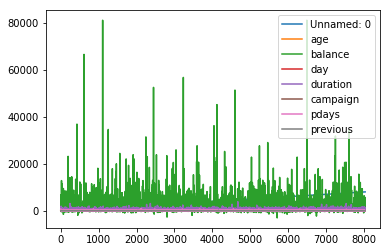

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


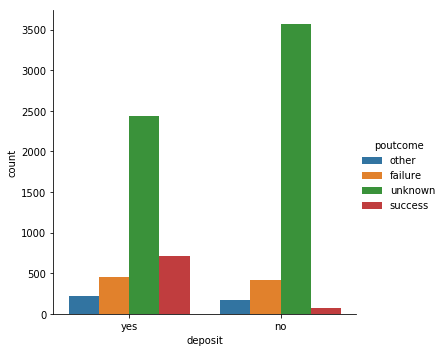

,Unnamed: 0,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
job,,,,,,,,,,,,,,,,,
services,0,60,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
student,1,25,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
services,2,38,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
management,3,40,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
technician,4,39,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no


,Unnamed: 0,age,default,balance,housing,contact,day,month,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,0,60,no,4256,yes,cellular,16,aug,239,3,...,0,1,0,0,0,0,0,0,1,0
1,1,25,no,154,no,cellular,3,mar,141,1,...,0,0,1,0,0,0,0,1,0,0
2,2,38,no,507,yes,cellular,17,apr,55,1,...,0,1,0,0,0,0,0,1,0,0
3,3,40,no,1361,no,cellular,29,jan,1473,1,...,0,0,0,0,0,0,0,0,1,0
4,4,39,no,834,yes,cellular,20,apr,390,1,...,0,0,0,1,0,0,0,1,0,0
5,5,36,no,2987,yes,cellular,12,aug,307,1,...,0,0,0,0,0,0,0,0,1,0
6,6,40,no,1953,yes,unknown,6,jun,112,5,...,0,0,0,0,0,0,0,0,1,0
7,7,51,no,513,yes,cellular,29,jul,331,2,...,0,1,0,0,0,0,0,1,0,0
8,8,51,no,1495,no,telephone,25,jul,1946,4,...,0,0,0,0,0,0,1,0,0,0
9,9,38,no,6836,yes,unknown,29,may,374,4,...,0,0,0,0,0,0,0,0,1,0


Uczenie maszynowe oraz test na zbiorze testowym


In [105]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 7, min_samples_leaf = 10, random_state = 0)
forest_model = RandomForestClassifier(max_depth = 8, max_leaf_nodes = 9, n_estimators = 300, random_state = 0)
gradboost_model = GradientBoostingClassifier(learning_rate =  0.01, max_depth = 7,
                                             max_features = 1.0, n_estimators = 200, subsample = 1.0, random_state = 0)

In [106]:
tree_acc, my_tree = my_models(tree_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Decision Tree is", tree_acc)

forest_acc, my_forest = my_models(forest_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Random Forest is", forest_acc)

gradboost_acc, my_gradboost = my_models(gradboost_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Gradient Boosting is", gradboost_acc)

[ 0.          0.11270727  0.          0.02238899  0.          0.04443743
  0.61800984  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.20245648]
0.6448
The accuracy of Decision Tree is 0.653670676068


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[  1.05395660e-03   3.97721886e-02   2.78536733e-02   3.27263258e-02
   2.98257964e-02   1.95253296e-01   3.61789582e-01   6.26962193e-03
   2.38427298e-02   5.33634892e-04   3.32658151e-02   5.09316531e-03
   1.90021701e-02   8.86617260e-04   3.93144020e-04   1.32664452e-03
   2.41066942e-02   1.38647101e-03   2.28952857e-02   6.43838302e-04
   7.99334443e-04   7.78208276e-04   2.75369879e-05   8.47137941e-03
   1.02336534e-03   1.60979524e-01]
0.656533333333
The accuracy of Random Forest is 0.663625051846


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.00576215  0.0768851   0.00377711  0.01659209  0.01716034  0.03537417
  0.39497493  0.00512724  0.00584406  0.01409706  0.03283141  0.00616923
  0.02251126  0.00486177  0.0027857   0.00543733  0.00814887  0.00978516
  0.01195898  0.00839988  0.00719471  0.00661512  0.00186023  0.01963969
  0.00884471  0.26736169]
0.690844444444
The accuracy of Gradient Boosting is 0.659062629614


(powyżej) Dokładność jaką uzyskaliśmy przy przewidywaniu (The accuracy of Gradient Boosting is 0.659062629614)

In [107]:
final_test = train_processed[final_features]

tree_prediction = my_tree.predict(final_test)
forest_prediction = my_forest.predict(final_test)
gradboost_prediction = my_gradboost.predict(final_test)

test_cp1 = train_processed[:]
test_cp2 = train_processed[:]
test_cp3 = train_processed[:]

headers = ["job", "deposit"]

test_cp1["deposit"] = tree_prediction
tree_prediction = pd.DataFrame(test_cp1, columns = headers)
tree_prediction.to_csv("tree_prediction.csv", index = False)

test_cp2["deposit"] = forest_prediction
forest_prediction = pd.DataFrame(test_cp2, columns = headers)
forest_prediction.to_csv("forest_prediction.csv", index = False)

test_cp3["deposit"] = gradboost_prediction
gradboost_prediction = pd.DataFrame(test_cp3, columns = headers)
gradboost_prediction.to_csv("gradboost_prediction.csv", index = False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


NameError: name 'moj_dataframe_z_pliku_treningowy' is not defined

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[ 0.          0.11270727  0.          0.02238899  0.          0.04443743
  0.61800984  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.20245648]
0.6448
The accuracy of Decision Tree is 0.653670676068
[  1.05395660e-03   3.97721886e-02   2.78536733e-02   3.27263258e-02
   2.98257964e-02   1.95253296e-01   3.61789582e-01   6.26962193e-03
   2.38427298e-02   5.33634892e-04   3.32658151e-02   5.09316531e-03
   1.90021701e-02   8.86617260e-04   3.93144020e-04   1.32664452e-03
   2.41066942e-02   1.38647101e-03   2.28952857e-02   6.43838302e-04
   7.99334443e-04   7.78208276e-04   2.75369879e-05   8.47137941e-03
   1.02336534e-03   1.60979524e-01]
0.656533333333
The accuracy of Random Forest is 0.663625051846


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.00576215  0.0768851   0.00377711  0.01659209  0.01716034  0.03537417
  0.39497493  0.00512724  0.00584406  0.01409706  0.03283141  0.00616923
  0.02251126  0.00486177  0.0027857   0.00543733  0.00814887  0.00978516
  0.01195898  0.00839988  0.00719471  0.00661512  0.00186023  0.01963969
  0.00884471  0.26736169]
0.690844444444
The accuracy of Gradient Boosting is 0.659062629614
